mu_list: [1.5        1.53333333 1.56666667 1.6        1.63333333 1.66666667
 1.7        1.73333333 1.76666667 1.8        1.83333333 1.86666667
 1.9        1.93333333 1.96666667 2.         2.03333333 2.06666667
 2.1        2.13333333 2.16666667 2.2        2.23333333 2.26666667
 2.3        2.33333333 2.36666667 2.4        2.43333333 2.46666667
 2.5       ]
N_list: [ 16  32  64 128 256]
cycles_per_N: {16: 16, 32: 32, 64: 64, 128: 128, 256: 256}
samples: 10


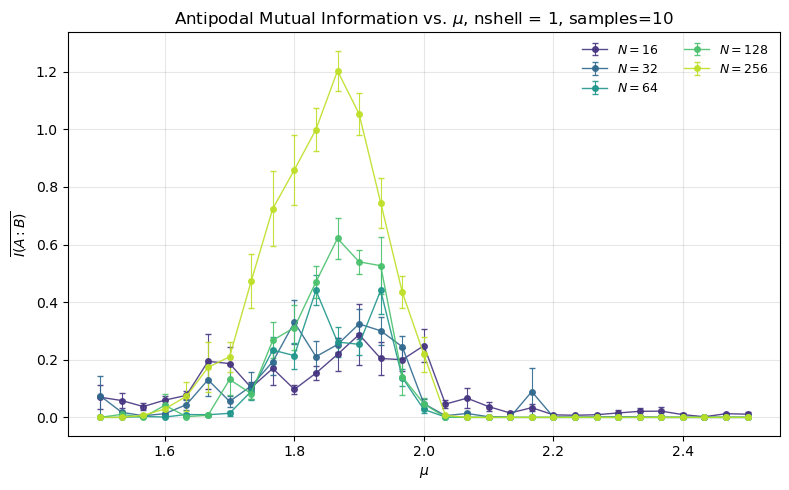

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Load saved data (dict-like entries need allow_pickle=True)
data = np.load('results/mi_scan_vs_mu_vs_N_nshell=1.npz', allow_pickle=True)

mu_list = data["mu_list"]
print("mu_list:", mu_list)
N_list = data["N_list"]
print("N_list:", N_list)
mi_mean = data["mi_mean"].item()
mi_std = data["mi_std"].item()
cycles_per_N = data["cycles_per_N"].item()
print("cycles_per_N:", cycles_per_N)
samples = int(data["samples"])
print("samples:", samples)

fig, ax = plt.subplots(figsize=(8, 5))
colors = cm.viridis(np.linspace(0.15, 0.9, len(N_list)))
marker = "o"

for ci, N in enumerate(N_list):
    mean_arr = np.array(mi_mean[N])
    std_arr = np.array(mi_std[N])
    ax.errorbar(
        mu_list,
        mean_arr,
        yerr=std_arr / np.sqrt(samples),
        marker=marker,
        color=colors[ci],
        label=rf"$N={int(N)}$",
        linewidth=1.0,
        markersize=4,
        elinewidth=0.8,
        capsize=2.5,
        alpha=0.9,
    )

ax.set_xlabel(r"$\mu$")
ax.set_ylabel(r"$\overline{I(A:B)}$")
ax.set_title(rf"Antipodal Mutual Information vs. $\mu$, nshell = 1, samples={samples}")
ax.grid(True, alpha=0.3)
ax.legend(frameon=False, ncol=2, fontsize=9)
fig.tight_layout()
plt.show()
